In [2]:
import msprime, tskit
from IPython.display import SVG
import numpy as np
import matplotlib.pyplot as plt
from algorithm import *

In [3]:
ts = msprime.sim_ancestry(3, population_size=2000, sequence_length=1e4, recombination_rate=1e-8, random_seed=78)

In [4]:
ts.num_trees

4

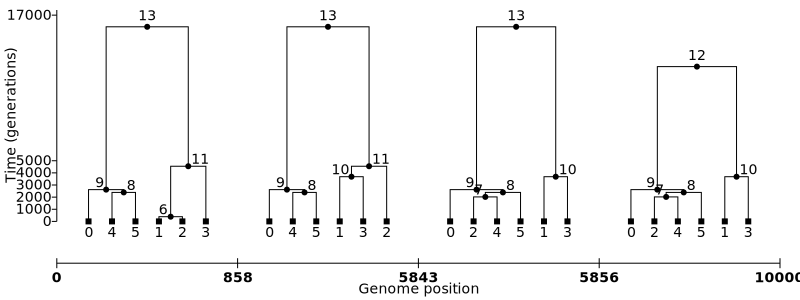

In [15]:
SVG(ts.draw_svg(y_axis=True, size=(800,300), x_scale = "treewise", y_ticks=[0,1000,2000,3000,4000,5000,17000]))

Forwards
ping!! 5 + 8 = 7
       3:8 + 8:9 -> 3:9
ping!! 16 + 33 = 32
       10:11 + 11:17 -> 10:17
ping!! 5 + 8 = 7
       3:8 + 8:9 -> 3:9
ping!! 11 + 16 = 15
       7:10 + 10:11 -> 7:11
ping!! 5 + 8 = 7
       3:8 + 8:9 -> 3:9
ping!! 11 + 16 = 15
       7:10 + 10:11 -> 7:11
ping!! 5 + 8 = 7
       3:8 + 8:9 -> 3:9
ping!! 2 + 15 = 13
       1:7 + 7:11 -> 1:11
ping!! 5 + 8 = 7
       3:8 + 8:9 -> 3:9
ping!! 7 + 22 = 21
       3:9 + 9:14 -> 3:14
ping!! 2 + 15 = 13
       1:7 + 7:11 -> 1:11
ping!! 2 + 15 = 13
       1:7 + 7:11 -> 1:11
ping!! 2 + 15 = 13
       1:7 + 7:11 -> 1:11
ping!! 20 + 26 = 24
       11:13 + 13:15 -> 11:15
ping!! 2 + 15 = 13
       1:7 + 7:11 -> 1:11
Reverse
ping!! 17 + 31 = 26
       5:12 + 12:17 -> 5:17
ping!! 3 + 11 = 9
       5:7 + 7:10 -> 5:10
ping!! 15 + 30 = 28
       10:11 + 11:17 -> 10:17
ping!! 3 + 11 = 9
       5:7 + 7:10 -> 5:10
Forwards
ping!! 10 + 14 = 13
       7:10 + 10:11 -> 7:11
ping!! 5 + 8 = 7
       3:8 + 8:9 -> 3:9
ping!! 10 + 14 = 13
       7

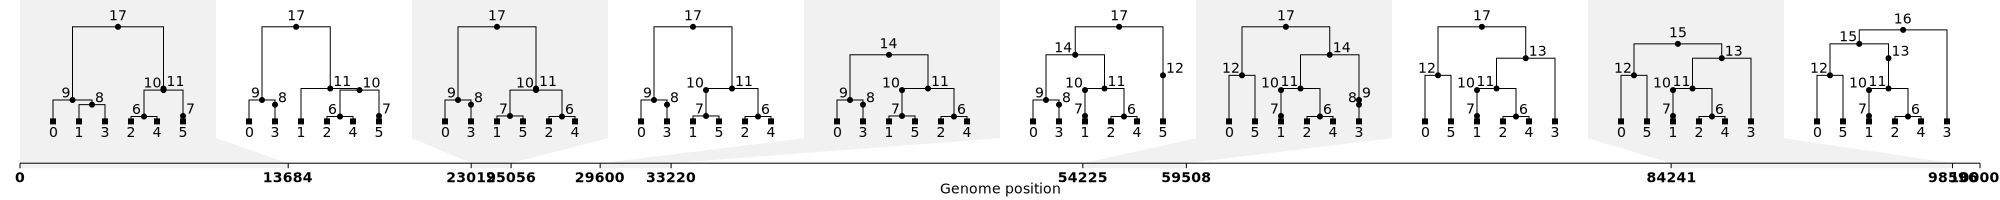

In [5]:
new_ts, num_edges = extend_edges(ts, verbose=True)
print(num_edges)
SVG(new_ts.draw_svg())

In [6]:
def verify_extending(ts):
    ets, num_edges = extend_edges(ts)
    sts = ets.simplify()
    sts.tables.assert_equals(ts.tables, ignore_provenance=True)
    # print(num_edges)
    
verify_extending(ts)

In [7]:
for seed in range(1, 100000):
    ts = msprime.sim_ancestry(3, population_size=2000, sequence_length=1e5, recombination_rate=1e-8, random_seed=seed)
    try:
        verify_extending(ts)
    except:
        print("Oh no!!", seed)
        break

In [8]:
Svals = [100, 1000, 10000]
Lvals = np.linspace(1e4, 3e6, 31)
num_edge_lists = {}
for S in Svals:
    nel = []
    for L in Lvals:
        ts = msprime.sim_ancestry(
            1000, 
            population_size=1000,
            sequence_length=int(L),
            recombination_rate=1e-8,
        )
        ets, num_edges = extend_edges(ts)
        nel.append(num_edges)
    num_edge_lists[S] = nel

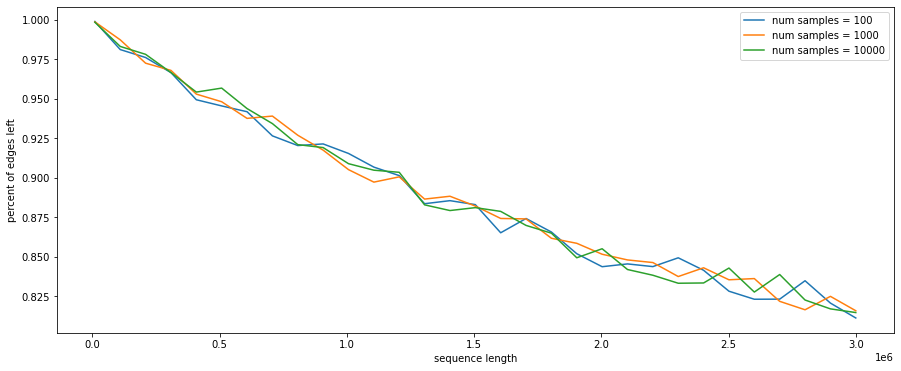

In [9]:
fig, ax = plt.subplots(figsize=(15, 6))

for S in Svals:
    reduction = [x[-1] / x[0] for x in num_edge_lists[S]]
    ax.plot(Lvals, reduction, label=f"num samples = {S}")
ax.set_xlabel("sequence length")
ax.set_ylabel("percent of edges left")
ax.legend();

In [11]:
import time
ts = msprime.sim_ancestry(
        1000, 
        population_size=1000,
        sequence_length=1e7,
        recombination_rate=1e-8,
    )
ets, _ = extend_edges(ts)

before_time = time.time()
a = ts.Tajimas_D()
next_time = time.time()
b = ets.Tajimas_D()
after_time = time.time()

print(f"Before: {next_time - before_time}, after: {after_time - next_time}")

Before: 0.0016319751739501953, after: 0.0013375282287597656


In [12]:
(next_time - before_time) / (after_time - next_time), ts.num_edges / ets.num_edges

(1.2201426024955437, 1.4206036745406825)

In [2]:
1/1.42, 1/1.22

(0.7042253521126761, 0.819672131147541)